In [1]:
# exploring RSA for the Similarity datasets

In [1]:
import os
import sys
parent_dir = "/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024"
sys.path.append(parent_dir)
parent_dir="/Midgard/home/farzantn/mambaforge/envs/MolTran_CUDA11_cuda/lib/python3.8"
sys.path.append(parent_dir)

In [3]:
print(sys.path)
base_dir = '/local_storage/datasets/farzaneh/alignment_olfaction_datasets/'

['/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python38.zip', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/lib-dynload', '', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages/alvadesccliwrapper-1.0.8-py3.8.egg', '/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024', '/Midgard/home/farzantn/mambaforge/envs/MolTran_CUDA11_cuda/lib/python3.8']


In [4]:
# base_path= '../../../../../../T5 EVO/'

In [5]:
device_name='cuda'
import ast
from datetime import datetime
from argparse import Namespace
import yaml
print(os.getcwd())
print(sys.path)
import matplotlib.pyplot as plt
print(os.getcwd())


# Determine the path to the 'hparams.yaml' file relative to the script's location
script_dir = os.getcwd()
yaml_path = os.path.join(script_dir, 'custom_utils/hparams.yaml')

with open('../custom_utils/hparams.yaml', 'r') as f:
    config = Namespace(**yaml.safe_load(f))
    
from custom_utils.tokenizer.tokenizer import MolTranBertTokenizer
from custom_utils.train_pubchem_light import LightningModule

from utils.util_alignment import *
from utils.prepare_datasets import *
from utils.custom_models import *


from constants import gs_lf_tasks
# import torch
# import random

# 
# 
# 
# 
from custom_utils.data_utils import get_class_imbalance_ratio
# 

# # from train_pubchem_light import LightningModule

# import seaborn as sns

/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks
['/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python38.zip', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/lib-dynload', '', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages/alvadesccliwrapper-1.0.8-py3.8.egg', '/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024', '/Midgard/home/farzantn/mambaforge/envs/MolTran_CUDA11_cuda/lib/python3.8']
/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks


Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [6]:
seed = 2024
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
# random.seed(seed)
torch.cuda.manual_seed_all(seed)

In [7]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 25
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',**{'family':'serif','serif':['Times']})

# Loading Models

## Loading MolFormer Model

In [8]:
tokenizer = MolTranBertTokenizer('../custom_utils/tokenizer/bert_vocab.txt')
ckpt = '../MoLformer_Pretrained/checkpoints/N-Step-Checkpoint_3_30000.ckpt'
lm = LightningModule(config, tokenizer.vocab).load_from_checkpoint(ckpt, config=config, vocab=tokenizer.vocab)

/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks
/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


Global seed set to 12345


Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks


Global seed set to 12345


Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


# Loading Human Embeddings

## Ravia 2020 Similarity

In [9]:
df_ravia,df_ravia_similarity_mean, df_ravia_similarity_mean_pivoted=prepare_ravia_or_snitz(dataset='curated_datasets/tasks/curated_ravia2020_behavior_similairity.csv',base_path=base_dir)

## Snitz 2013

In [10]:
df_snitz, df_snitz_mean,df_snitz_mean_pivoted=prepare_ravia_or_snitz(dataset='curated_datasets/tasks/curated_snitz2013.csv',base_path=base_dir)

# Extracting embedding from MoLFormer

In [11]:
indices_train,indices_valid,indices_test = extract_set_idxs(base_dir, indices_path='curated_datasets/embeddings/pom/gslf-splits-idx.csv')

##  GS-LF 

In [12]:
input_file_molformer = 'curated_datasets/embeddings/molformer/gslf_molformer_embeddings_13_Apr17.csv'

gs_lf, gs_lf_np,gs_lf_y,gs_lf_embeddings_train,gs_lf_y_train,gs_lf_embeddings_valid,gs_lf_y_valid,gs_lf_embeddings_test,gs_lf_y_test = extract_set_from_indices(base_dir,input_file_molformer ,"embeddings","y", indices_train, indices_valid, indices_test)

## GS-LF

In [13]:
embedding_train_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_train,gs_lf_y_train)
embedding_test_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_test,gs_lf_y_test)
embedding_valid_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_valid,gs_lf_y_valid)

dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_np,gs_lf_y)

## Ravia2020

In [14]:
modeldeepchem_gslf = None
res_ravia=prepare_ravia_similarity_mols_mix_on_smiles(df_ravia_similarity_mean, lm, tokenizer)

# df_ravia_similarity_mols_smiles,df_ravia_similarity_mols_embeddings_original_smiles,df_ravia_similarity_mols_layers_original_smiles\
# ,df_ravia_similarity_mols_embeddings_smiles,df_ravia_similarity_mols_embeddings_zscored_smiles,\
# df_ravia_similarity_mols_layers_smiles,df_ravia_similarity_mols_layers_zscored_smiles\
# =res_ravia

In [15]:
input_file_molformr='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/ravia_molformer_embeddings_13_Apr17.csv'
df_ravia_similarity_mols_reps,df_ravia_similarity_mols_embeddings_original_reps\
,df_ravia_similarity_mols_embeddings_reps,df_ravia_similarity_mols_embeddings_zscored_reps\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformr, df_ravia_similarity_mean)

columns ['CID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '1

In [16]:
df_ravia_similarity_mols_smiles,df_ravia_similarity_mols_embeddings_original_smiles\
,df_ravia_similarity_mols_embeddings_smiles,df_ravia_similarity_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_ravia_similarity_mean, lm, tokenizer)

## Snitz 2013 

In [17]:
df_snitz_mols,df_snitz_mols_embeddings_original,df_snitz_mols_layers_original,\
 df_snitz_mols_embeddings,df_snitz_mols_embeddings_zscored,\
df_snitz_mols_layers,df_snitz_mols_layers_zscored\
=prepare_snitz_mols(df_snitz_mean,modeldeepchem_gslf,lm,tokenizer)

In [52]:
df_snitz_mols_smiles,df_snitz_mols_embeddings_original_smiles\
,df_snitz_mols_embeddings_smiles,df_snitz_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_snitz_mean, lm, tokenizer)

# Extracting embedding from OpenPom


## Ravia2020 

In [18]:
input_file_pom='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/ravia_pom_embeddings_Apr17.csv'

df_ravia_similarity_mols_pom,df_ravia_similarity_mols_embeddings_original_pom\
,df_ravia_similarity_mols_embeddings_pom,df_ravia_similarity_mols_embeddings_zscored_pom\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom, df_ravia_similarity_mean, modeldeepchem_gslf)

columns ['CID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '1

## Snitz 2013

In [19]:
# input_file_alva = '/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/gslf_molecules_alva_y_Apr17.csv'
# pd.read_csv(input_file_alva)

In [20]:
input_file_pom_snitz='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/snitz_pom_embeddings_Apr17.csv'
# pd.read_csv(input_file_pom_snitz)

In [21]:
# df_snitz_mols_pom,df_snitz_mols_embeddings_original_pom,df_snitz_mols_embeddings_pom,df_snitz_mols_embeddings_zscored_pom=prepare_mols_other(input_file_pom_snitz, df_snitz_mean,modeldeepchem_gslf)

In [22]:
df_snitz_mols_pom,df_snitz_mols_embeddings_original_pom\
,df_snitz_mols_embeddings_pom,df_snitz_mols_embeddings_zscored_pom\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom_snitz, df_snitz_mean, modeldeepchem_gslf,sep=',')

columns ['CID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '1

In [23]:
# df_snitz_mols_embeddings_pom

# Extract Embeddings from DAM

In [24]:
# input_file_alva='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/ravia_molecules_alva_17Apr.csv'
# 
# df_ravia_similarity_mols_alva,df_ravia_similarity_mols_embeddings_original_alva\
# ,df_ravia_similarity_mols_embeddings_alva,df_ravia_similarity_mols_embeddings_zscored_alva\
# =prepare_mols_DAM(input_file_alva,df_ravia_similarity_mean,modeldeepchem_gslf)

In [25]:
# cosine_sim_df_ravia_similarity_mols_embeddings_alva,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_alva\
# =cosine_sim_helper_mixture(df_ravia_similarity_mols_embeddings_alva,df_ravia_similarity_mols_embeddings_zscored_alva)

In [26]:
# df_snitz_mols_embeddings_linear

## Snitz

In [27]:
input_file_dam='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/snitz_molecules_alva_y_Apr17.csv'
pd.read_csv(input_file_dam).head(5)

df_snitz_mols_DAM,df_snitz_mols_embeddings_original_DAM\
,df_snitz_mols_embeddings_DAM,df_snitz_mols_embeddings_zscored_DAM\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_snitz_mean, modeldeepchem_gslf,sep=',',end='20')

columns ['CID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Combined']


## Ravia

In [28]:
input_file_dam='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/ravia_molecules_alva_y_Apr17.csv'
pd.read_csv(input_file_dam).head(5)

df_ravia_mols_DAM,df_ravia_mols_embeddings_original_DAM\
,df_ravia_mols_embeddings_DAM,df_ravia_mols_embeddings_zscored_DAM\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_ravia_similarity_mean, modeldeepchem_gslf,sep=';',end='20')

columns ['CID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Combined']


# Cosine Similarity

## DAM

### Snitz

In [29]:
cosine_sim_df_snitz_mols_embeddings_DAM,cosine_sim_df_snitz_mols_embeddings_zscored_DAM\
=cosine_sim_helper(df_snitz_mols_embeddings_DAM, df_snitz_mols_embeddings_zscored_DAM)

# cosine_sim_df_snitz_similarity_mols_layers,cosine_sim_df_snitz_similarity_mols_layers_zscored\
# =cosine_sim_helper_layers(df_snitz_similarity_mols_embeddings_smiles, df_snitz_similarity_mols_embeddings_zscored_smiles, df_snitz_similarity_mols_layers_smiles, df_snitz_similarity_mols_layers_zscored_smiles)

### Ravia

In [30]:
cosine_sim_df_ravia_mols_embeddings_DAM,cosine_sim_df_ravia_mols_embeddings_zscored_DAM\
=cosine_sim_helper(df_ravia_mols_embeddings_DAM, df_ravia_mols_embeddings_zscored_DAM)

# cosine_sim_df_ravia_similarity_mols_layers,cosine_sim_df_ravia_similarity_mols_layers_zscored\
# =cosine_sim_helper_layers(df_ravia_similarity_mols_embeddings_smiles, df_ravia_similarity_mols_embeddings_zscored_smiles, df_ravia_similarity_mols_layers_smiles, df_ravia_similarity_mols_layers_zscored_smiles)

## POM

### Snitz

In [31]:
cosine_sim_df_snitz_mols_embeddings_pom,cosine_sim_df_snitz_mols_embeddings_zscored_pom\
=cosine_sim_helper(df_snitz_mols_embeddings_pom, df_snitz_mols_embeddings_zscored_pom)

# cosine_sim_df_snitz_mols_layers,cosine_sim_df_snitz_mols_layers_zscored \
# =cosine_sim_helper_layers(df_snitz_mols_embeddings, df_snitz_mols_embeddings_zscored, df_snitz_mols_layers, df_snitz_mols_layers_zscored)

### Ravia

In [32]:
cosine_sim_df_ravia_similarity_mols_embeddings_pom,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_pom, df_ravia_similarity_mols_embeddings_zscored_pom)### Cosine Similarity

### MoLFormer

#### Snitz

In [33]:
cosine_sim_df_snitz_mols_embeddings_molformer,cosine_sim_df_snitz_mols_embeddings_zscored_molform\
=cosine_sim_helper(df_snitz_mols_embeddings, df_snitz_mols_embeddings_zscored)

In [56]:
cosine_sim_df_snitz_mols_embeddings_smiles,cosine_sim_df_snitz_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_snitz_mols_embeddings_smiles, df_snitz_mols_embeddings_zscored_smiles)

#### Ravia

In [34]:
cosine_sim_df_ravia_similarity_mols_embeddings_reps,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_reps, df_ravia_similarity_mols_embeddings_zscored_reps)

In [50]:
cosine_sim_df_ravia_similarity_mols_embeddings_smiles,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_smiles, df_ravia_similarity_mols_embeddings_zscored_smiles)


In [35]:
# df_gslf_mols_embeddings_zscored.to_csv('df_gslf_mols_embeddings_zscored.csv', index=False)
# df_gslf_mols.to_csv('df_gslf_mols.csv', index=False)

# Visualization

In [36]:
# df_gslf_mols_layers# fig, axes = plt.subplots(1, 4, sharex=True, figsize=(16,8))
df_gslf_mols, _,_,_,df_gslf_mols_embeddings_zscored,_,_=prepare_goodscentleffignwell_mols(modeldeepchem_gslf,lm,tokenizer)


# type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
size1 = (0.3, 0.28)

# type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
size2 = (0.6, 1)

# type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
size3 = (1, 0.35)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_mols_embeddings_zscored['Combined'].values.tolist()),np.asarray(df_gslf_mols.y.values.tolist()), "/kaggle/working/", gs_lf_tasks,"2",size1,size2,size3)
# pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), "/kaggle/working/", TASKS,"1",size1,size2,size3)


<Figure size 1000x1000 with 0 Axes>

In [37]:
input_embeddings='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/gslf_pom_embeddings_Apr17.csv'
df_gslf_pom = pd.read_csv(input_embeddings, converters={'embeddings': pd.eval , "y": pd.eval})

# type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
size1 = (0.3,0.86)

# type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
size2 = (0.9, .7)

# type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
size3 = (0.3, 0.2)



# type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
size1 = (0.8, 0.4)

# type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
size2 = (0.9, 1.01)

# type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
size3 = (0.4, 1.02)



plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), "/kaggle/working/", gs_lf_tasks,"1",size1,size2,size3)


<Figure size 1000x1000 with 0 Axes>

# Correlations

## Molformer

### Ravia

In [51]:
corr_last_ravia_similarity,corr_last_ravia_similarity_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps)

corr_last_ravia_similarity_smiles,corr_last_ravia_similarity_smiles_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles)

### Snitz

In [39]:
# df_snitz_mean_pivoted

In [57]:
corr_last_snitz,corr_last_snitz_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molform)

corr_last_snitz_smiles,corr_last_snitz_smiles_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_smiles)

## Open-POM

#### Ravia

In [41]:
corr_last_ravia_similarity_pom,corr_last_ravia_similarity_pvalue_pom=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom)

#### Snitz

In [42]:
corr_last_snitz_pom,corr_last_snitz_pvalue_pom=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom)

## DAM

### Ravia

In [43]:
corr_last_ravia_similarity_dam,corr_last_ravia_similarity_pvalue_dam=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM)

### Snitz

In [44]:
corr_last_snitz_dam,corr_last_snitz_pvalue_dam=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM)

In [45]:
# corr_last_ravia_similarity_alva,corr_last_ravia_similarity_pvalue_alva=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_alva)
# 
# corr_last_ravia_similarity_alva,corr_last_ravia_similarity_pvalue_alva=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_DAM,equalize_size=True)

In [46]:
# corr_last_snitz_pom,corr_last_snitz_pvalue_pom=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom,equalize_size=True)

In [47]:
# corr_last_snitz_alva,corr_last_snitz_pvalue_alva=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_alva,equalize_size=True)

In [48]:
# corr_last_linear_ravia_similarity,corr_last_linear_ravia_similarity_pvalue,corr_layers_ravia_similarity,corr_layers_ravia_similarity_pvalue=correlation_helper(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_linear_zscored,cosine_sim_df_ravia_similarity_mols_layers_zscored,equalize_size=True)

# corr_last_keller,corr_last_keller_pvalue,corr_layers_keller,corr_layers_keller_pvalue=correlation_helper(cosine_sim_df_keller_zscored,cosine_sim_df_keller_mols_embeddings_zscored,cosine_sim_df_keller_mols_layers_zscored,equalize_size=True)
# corr_last_linear_keller,corr_last_linear_keller_pvalue,corr_layers_keller,corr_layers_keller_pvalue=correlation_helper(cosine_sim_df_keller_zscored,cosine_sim_df_keller_mols_embeddings_linear_zscored,cosine_sim_df_keller_mols_layers_zscored,equalize_size=True)

# corr_last_snitz,corr_last_snitz_pvalue,corr_layers_snitz,corr_layers_snitz_pvalue=correlation_helper(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored,cosine_sim_df_snitz_mols_layers_zscored,equalize_size=True)
# corr_last_linear_snitz,corr_last_linear_snitz_pvalue,corr_layers_snitz,corr_layers_snitz_pvalue=correlation_helper(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_linear_zscored,cosine_sim_df_snitz_mols_layers_zscored,equalize_size=True)

NameError: name 'corr_last_linear_snitz' is not defined

In [ ]:
corr_last_ravia_similarity_pom

In [ ]:
corr_last_ravia_similarity

## Visualization

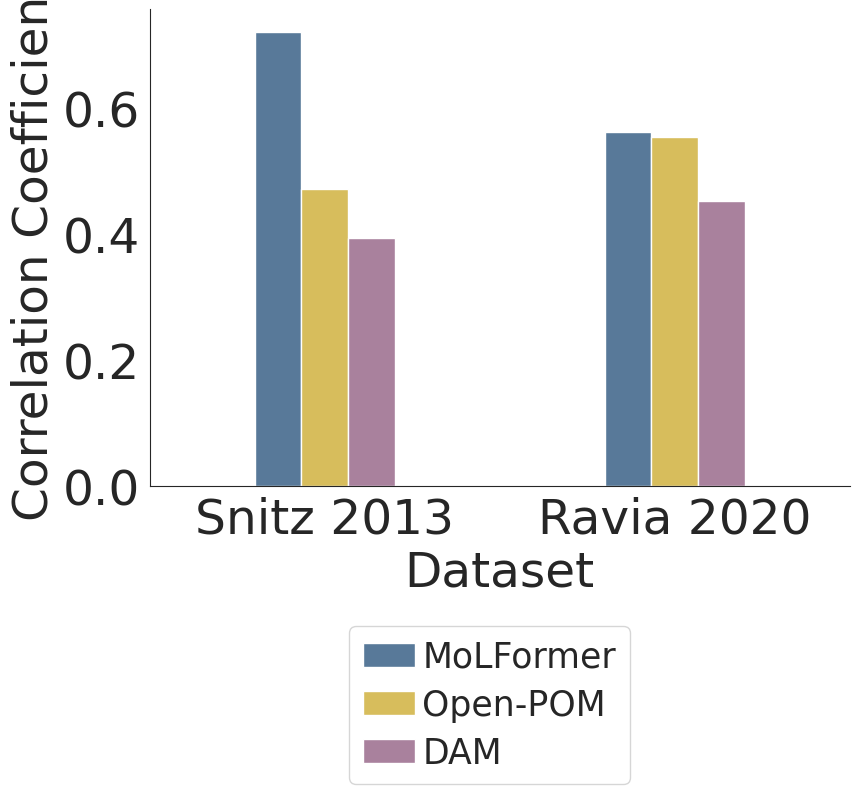

In [59]:
plt.rcParams["font.size"] = 35
data={
    'row_1':  [ "Snitz 2013","MoLFormer",corr_last_snitz],'row_2':["Ravia 2020","MoLFormer" ,corr_last_ravia_similarity],
    'row_3':["Ravia 2020","Open-POM" ,corr_last_ravia_similarity_pom], 'row_4':["Snitz 2013","Open-POM" ,corr_last_snitz_pom],
    'row_5':["Ravia 2020","DAM" ,corr_last_ravia_similarity_dam], 'row_6':["Snitz 2013","DAM" ,corr_last_snitz_dam],
    
    # , "row_3": ["Keller 2016","Raw Representations",corr_last_keller],
    # 'row_4':  [ "Snitz 2013","Transformed Representations",corr_last_linear_snitz],'row_5':["Ravia 2020 ","Transformed Representations" ,corr_last_linear_ravia_similarity] ,'row_3':["Ravia 2020 ","Raw Representations" ,corr_last_ravia_similarity_pom
    
    # , "row_6": ["Keller 2016","Transformed Representations",corr_last_linear_keller]

     }
plot_bars(data,"perception","figs/realign_correlations.pdf")
filename="figs/realign_correlations.pdf"

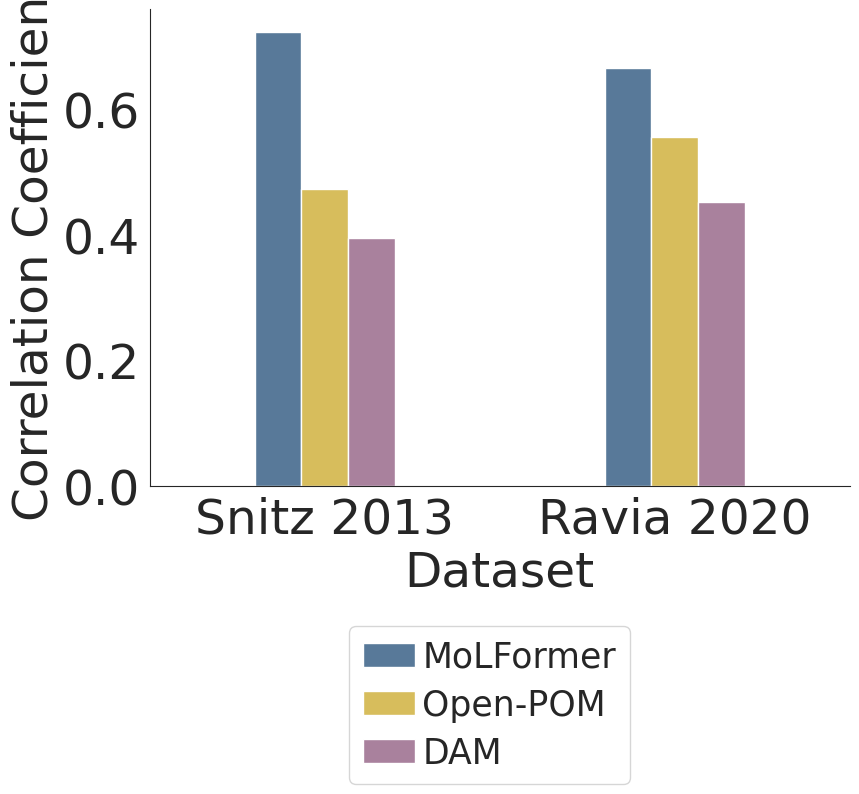

In [58]:
plt.rcParams["font.size"] = 35
data={
    'row_1':  [ "Snitz 2013","MoLFormer",corr_last_snitz_smiles],'row_2':["Ravia 2020","MoLFormer" ,corr_last_ravia_similarity_smiles],
    'row_3':["Ravia 2020","Open-POM" ,corr_last_ravia_similarity_pom], 'row_4':["Snitz 2013","Open-POM" ,corr_last_snitz_pom],
    'row_5':["Ravia 2020","DAM" ,corr_last_ravia_similarity_dam], 'row_6':["Snitz 2013","DAM" ,corr_last_snitz_dam],
    
    # , "row_3": ["Keller 2016","Raw Representations",corr_last_keller],
    # 'row_4':  [ "Snitz 2013","Transformed Representations",corr_last_linear_snitz],'row_5':["Ravia 2020 ","Transformed Representations" ,corr_last_linear_ravia_similarity] ,'row_3':["Ravia 2020 ","Raw Representations" ,corr_last_ravia_similarity_pom
    
    # , "row_6": ["Keller 2016","Transformed Representations",corr_last_linear_keller]

     }
plot_bars(data,"perception","figs/realign_correlations.pdf")
filename="figs/realign_correlations.pdf"

In [ ]:
plt.rcParams["font.size"] = 35   
data={'row_1':  [ "Snitz",corr_layers_snitz],'row_2':["Ravia" ,corr_layers_ravia_similarity] 
     # , "row_4": ["Keller 2016",corr_layers_keller]
     }
plot_lines(data,"perception","figs/realign_layers.pdf")